In [79]:
!Python --version

Python 3.10.9


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker
import random
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.gridspec as gridspec


In [55]:
from matplotlib import rc

from matplotlib import rcParams
plt.rc('text', usetex=True)

In [37]:
#parameters
A = 0.0041 
alpha = 5.276
gamma = 0.3
I=0.019

def eq(x):
    return alpha*A*np.exp(alpha*x)/gamma - 2*x + 3*x**2 #formula for dI∞(x)/dx 

#choose according to the maxima/minima you want to end up with
guess = -0.4 #maxima
#guess = 0.3 #minima

root = fsolve(eq, guess) #use fsolve to solve for dI∞(x)/dx=0
root[0] #solution of the extrema

0.2863874927043652

In [40]:
# collected from above
x_min = 0.2863874927043652
x_max = 0.051143193209885154

In [41]:
# I_max, I_min

I_max = A*np.exp(alpha*x_max)/gamma - x_max**2*(1-x_max)
I_min = A*np.exp(alpha*x_min)/gamma - x_min**2*(1-x_min)

I_max, I_min

(0.015417976156715866, 0.003397079040195275)

In [42]:
print("x, I, dI/dx") #printing a table of x, I∞(x), dI∞(x)/dx

for x in np.linspace(x_max, x_min, 100):
    print(x, A*np.exp(alpha*x)/gamma - x**2*(1-x),  alpha*A*np.exp(alpha*x)/gamma - 2*x + 3*x**2)

x, I, dI/dx
0.051143193209885154 0.015417976156715866 -2.2551405187698492e-17
0.05351939825528394 0.015414622120595075 -0.0028148833020992196
0.05589560330068273 0.015404637416021267 -0.005580857722584676
0.05827180834608152 0.015388138485348772 -0.008297733636549155
0.06064801339148031 0.015365242224355919 -0.01096531902682058
0.0630242184368791 0.015336065987965296 -0.013583419453781692
0.06540042348227788 0.015300727596036227 -0.016151838024809
0.06777662852767667 0.01525934533923031 -0.018670375363326237
0.07015283357307546 0.015212037984950941 -0.0211388295774674
0.07252903861847425 0.015158924783357789 -0.023556996228344455
0.07490524366387304 0.015100125473457146 -0.025924668297914462
0.07728144870927182 0.015035760289269083 -0.028241636156441874
0.07965765375467063 0.014965949966072447 -0.030507687529549805
0.08203385880006941 0.01489081574672865 -0.03272260746485577
0.0844100638454682 0.01481047938808516 -0.03488617829818688
0.08678626889086699 0.014725063167459883 -0.03699817

<IPython.core.display.Javascript object>


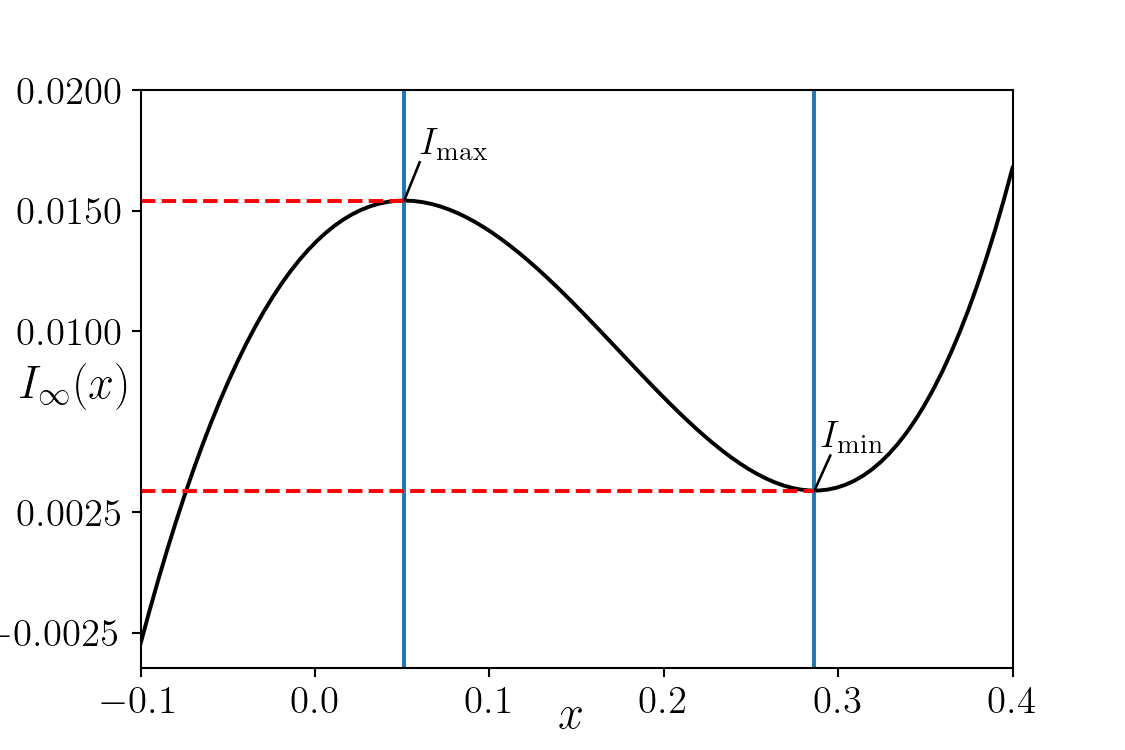

In [43]:
%matplotlib notebook

sz=18
X=np.linspace(-.1, 0.4, 100)
A = 0.0041
alpha = 5.276
gamma = 0.3

fX = []
dfX = []
d4fX = []

for x in X:
    fX+=[A*np.exp(alpha*x)/gamma - x**2*(1-x), ]
    dfX+=[alpha*A*np.exp(alpha*x)/gamma - 2*x + 3*x**2, ]
    d4fX+=[alpha**4*A*np.exp(alpha*x)/gamma, ]

plt.figure(figsize=(6, 4))
plt.plot(X, fX, 'k-')

#gamma = 0.3
plt.axvline(x = x_max)
plt.axvline(x = x_min)

# plt.xlabel("$x$", size = sz)
# plt.ylabel("", rotation=False, size = sz)
plt.text(-0.17, 0.0072, '$I_\\infty(x)$', size=sz)
plt.text(0.14, -0.0065, '$x$', size=sz)

plt.plot([0.051143193209885154, 0.06], [0.015417976156715866, 0.017], 'k-', lw=1)
plt.plot([0.2863874927043651, 0.2955], [0.003397079040195247, 0.00485], 'k-', lw=1)

plt.text(0.06, 0.0173, '$I_{\\rm max}$', size=15)
plt.text(0.29, 0.0052, '$I_{\\rm min}$', size=15)

plt.plot([-0.1, 0.051143193209885154], [0.015417976156715866, 0.015417976156715866], 'r--')
plt.plot([-0.1, 0.2863874927043651], [0.003397079040195247, 0.003397079040195247], 'r--')

plt.xlim(-0.1, 0.4)
plt.xticks(fontsize=15)
plt.yticks([-0.0025,  0.0025,   0.01, 0.015 , 0.02],fontsize=15)

plt.savefig('C:/Users/ighosh/Desktop/frac_dML/Iinfty.pdf')

# Different branches of equilibirum points according to five different cases of $I$ values

<IPython.core.display.Javascript object>


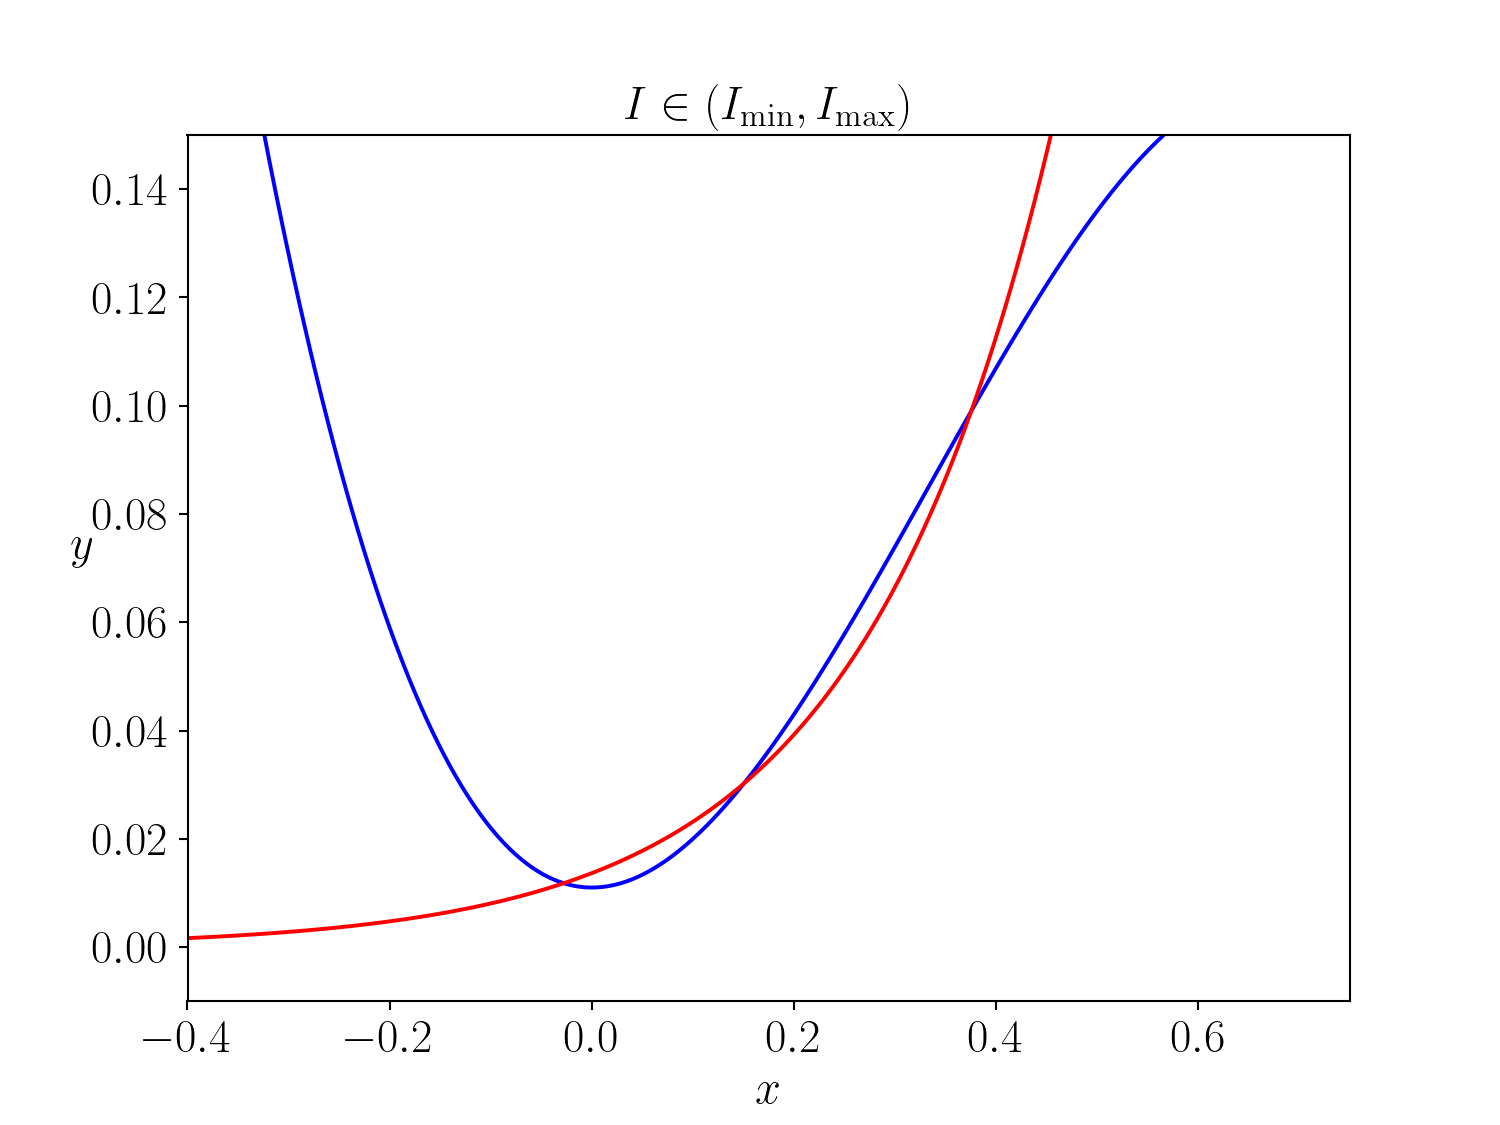

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
         0.16]),
 [Text(0, -0.02, '$\\mathdefault{−0.02}$'),
  Text(0, 0.0, '$\\mathdefault{0.00}$'),
  Text(0, 0.02, '$\\mathdefault{0.02}$'),
  Text(0, 0.039999999999999994, '$\\mathdefault{0.04}$'),
  Text(0, 0.06, '$\\mathdefault{0.06}$'),
  Text(0, 0.08, '$\\mathdefault{0.08}$'),
  Text(0, 0.09999999999999999, '$\\mathdefault{0.10}$'),
  Text(0, 0.12000000000000001, '$\\mathdefault{0.12}$'),
  Text(0, 0.14, '$\\mathdefault{0.14}$'),
  Text(0, 0.16, '$\\mathdefault{0.16}$')])

In [46]:

#parameters
A = 0.0041
alpha = 5.276
gamma = 0.3

# I = 0.0001 #<Imin
# I = 0.016 #>Imax
# I = 0.003397079040195247 #equals Imin
# I = 0.015417976156715866 #equals Imax
I = 0.011 #in Imin, Imax

sz=18
%matplotlib notebook
# x_vals = np.linspace(-1, 1, 200)
# y_vals = np.linspace(-.05, .2, 200)

x_vals = np.linspace(-.4, .75, 200)
y_vals = np.linspace(-.01, .15, 200)

# x_vals = np.linspace(-.5, .75, 200)
# y_vals = np.linspace(-.01, .15, 200)

X, Y = np.meshgrid(x_vals, y_vals)

#Nullclines
nullcline_x = X**2*(1-X) - Y + I
nullcline_y = A*np.exp(alpha*X) - gamma*Y 

plt.figure(figsize=(8, 6))
plt.contour(X, Y, nullcline_x, levels=[0], colors='b')
plt.contour(X, Y, nullcline_y, levels=[0], colors='r')

def eq(x):
    return x**2*(1-x)-A*np.exp(alpha*x)/gamma +I #solves for the equilibrium

guess=0.5 #change the guesses looking at the nullcines

root = fsolve(eq, guess)
r= root[0] #equilibirum

plt.xlabel("$x$", size=sz)
plt.ylabel("$y$", size=sz, rotation=False)

# plt.title("$I<I_{\\rm min} $", size=sz)
# plt.title("$I> I_{\\rm max} $", size=sz)
# plt.title("$I\\approx I_{\\rm min} $", size=sz)
# plt.title("$I\\approx I_{\\rm max} $", size=sz)
plt.title("$I \\in (I_{\\rm min}, I_{\\rm max})$", size=sz)


plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)

plt.savefig('C:/Users/ighosh/Desktop/frac_dML/Ie.pdf')

## Plotting the single-cell (two-dimensional) system

<IPython.core.display.Javascript object>


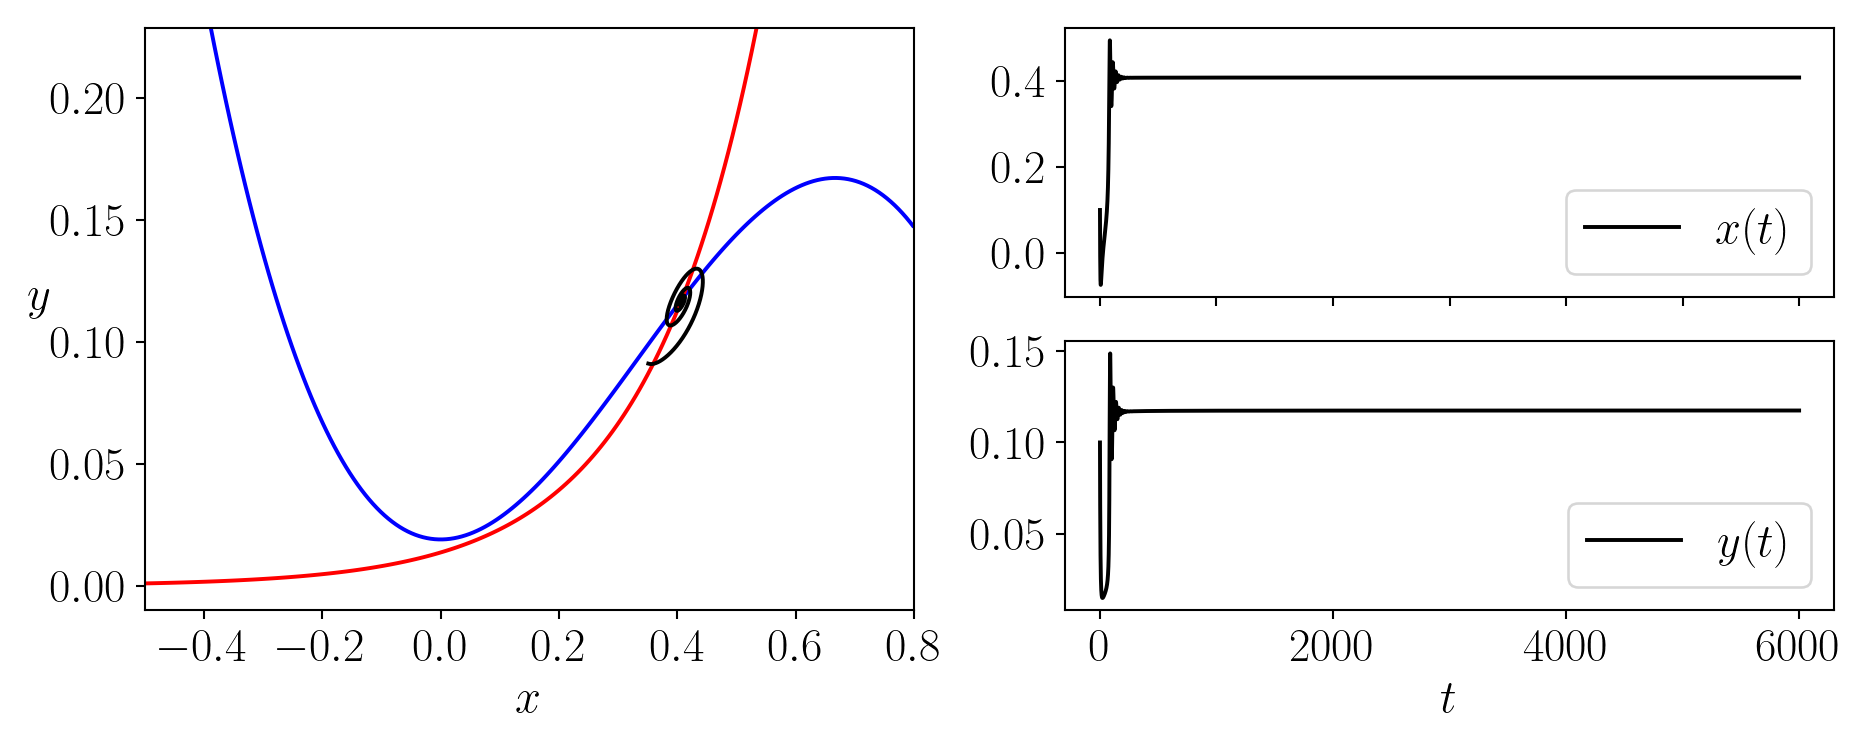

In [47]:
## Read csv data generated from Julia

# df = pd.read_csv("beta_1.csv")
# df = pd.read_csv("beta_0.99.csv")
# df = pd.read_csv("beta_betaStar.csv")
# df = pd.read_csv("beta_0.98.csv")
# df = pd.read_csv("beta_0.96.csv")
# df = pd.read_csv("beta_0.94.csv")
# df = pd.read_csv("beta_0.92.csv")
df = pd.read_csv("beta_0.9.csv") #read the csv

%matplotlib notebook

#parameters
A = 0.0041 
alpha = 5.276
gamma = 0.3
I=0.019

sz=18

x, y= df["x"], df["y"]

time = df["T"]

gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(10, 4))


ax = plt.subplot(gs[:, 0])

x_vals = np.linspace(-.5, .8, 200)
y_vals = np.linspace(-0.01, max(y)+.08, 200)

X, Y = np.meshgrid(x_vals, y_vals)

nullcline_x = X**2*(1-X) - Y + I
nullcline_y = A*np.exp(alpha*X) - gamma*Y 

plt.contour(X, Y, nullcline_x, levels=[0], colors='b')
plt.contour(X, Y, nullcline_y, levels=[0], colors='r')


plt.plot(x[10001:], y[10001:], 'k-', rasterized=True) #phase portrait
plt.xlabel("$x$", size=sz)
plt.ylabel("$y$", rotation=False,size=sz)
plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)

ax = plt.subplot(gs[0, 1]) 
plt.plot(time, x, 'k-', label = '$x(t)$') #time series
plt.xticks(visible=False)
plt.yticks(size=sz)
plt.legend(fontsize=sz)

ax = plt.subplot(gs[1, 1])
plt.plot(time, y, 'k-', label = '$y(t)$') #time series
plt.xlabel('$t$', size=sz)
plt.yticks(size=sz)
plt.xticks([0, 2000, 4000, 6000], size=sz)
plt.legend(fontsize=sz)

plt.tight_layout()

plt.savefig('C:/Users/ighosh/Desktop/frac_dML/pp_beta_0.9.pdf')


## compute $\beta^*, \tau(x^*), \delta(x^*)$ for two different $I = 0.019, 0.022$.

In [50]:
gamma = 0.3
A = 0.0041
alpha = 5.276

#I = 0.019
I = 0.022

def eq(x):
    return x**2*(1-x)-A*np.exp(alpha*x)/gamma + I

guess = 0.5
root = fsolve(eq, guess)
r = root[0]

tau = r*(2-3*r)-gamma
delta = -gamma*r*(2-3*r)+alpha*A*np.exp(alpha*r)
betaStar = 2*np.arccos(tau/(2*np.sqrt(delta)))/np.pi

r, tau, delta, betaStar

(0.4170711357176033,
 0.012297274688892246,
 0.10162755214718239,
 0.9877205136958772)

## Plot the bifurcation diagram with a $\beta$ sweep with $I$ fixed

<IPython.core.display.Javascript object>


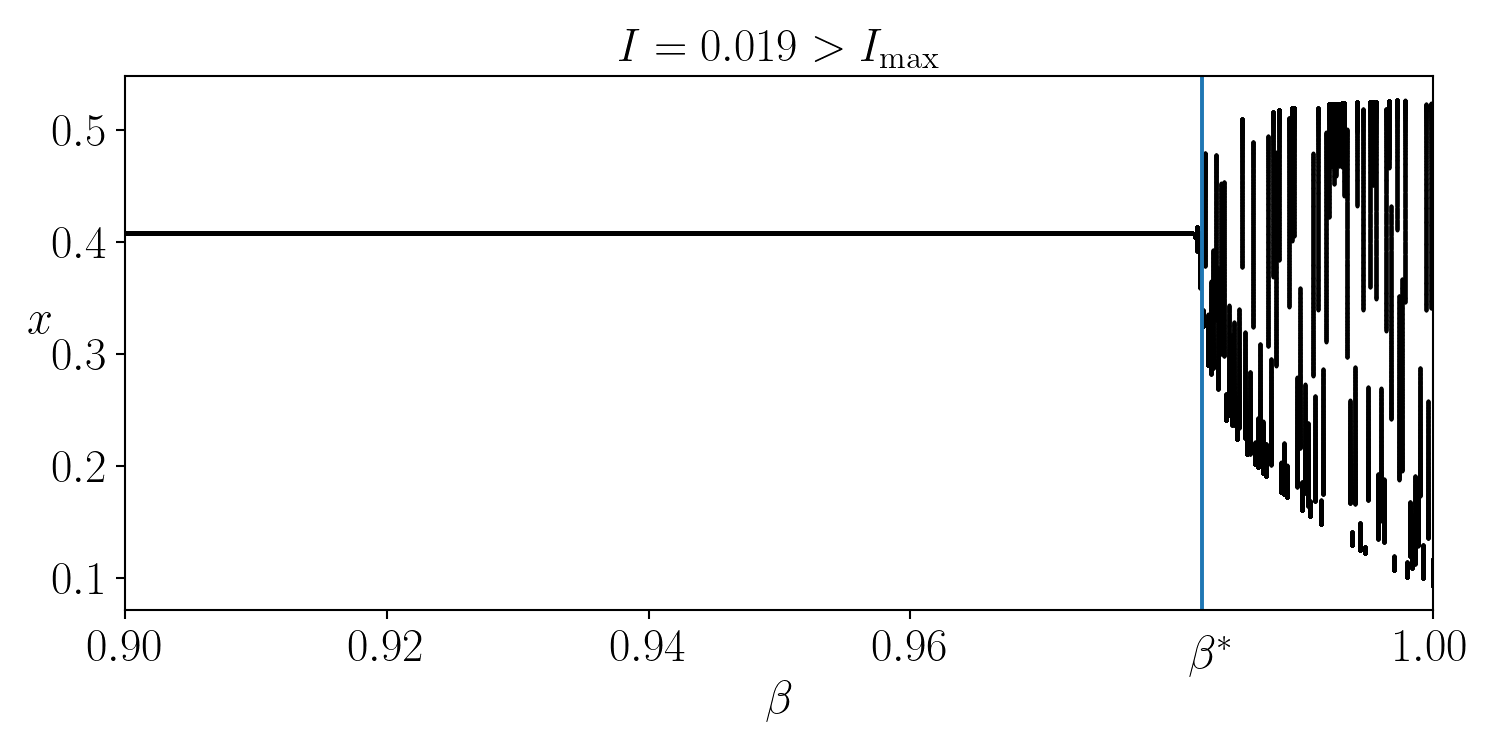

In [106]:

%matplotlib notebook

A = 0.0041 
alpha = 5.276
gamma = 0.3

I = 0.019
# I = 0.022

#collected from the above code cell
betaStar = 0.9823286778291465
# betaStar2 = 0.9877205136958772


bd = pd.read_csv("bifurcation_data_I_0.019.csv") #read the csv bifurcation data
# bd = pd.read_csv("bifurcation_data_I_0.022.csv")

bb = bd["β"]
ff = bd["F1"]

plt.figure(figsize=(8, 4))
plt.title("$I = 0.019 > I_{\\rm max}$", size=sz)

plt.plot(bb, ff, 'ko', ms=0.5, rasterized=True)
plt.xlabel('$\\beta$', size=sz)
plt.ylabel('$x$', rotation=False, size=sz)
plt.xticks(size=sz)
plt.yticks(size=sz)

plt.xticks([1, 0.96, 0.94, 0.92, 0.9], fontsize=sz)
plt.text(betaStar-0.001, 0.02, "$\\beta^*$", size= sz)

# plt.text(betaStar2-0.001, 0.06, "$\\beta^*$", size= sz)

plt.axvline(x= betaStar)
# plt.axvline(x= betaStar2)
plt.xlim(0.9, 1)

plt.tight_layout()

plt.savefig('C:/Users/ighosh/Desktop/frac_dML/BIF_I_0.019.pdf')

## Plot the bifurcation diagram with a $\beta$ sweep with $I$ fixed


<IPython.core.display.Javascript object>


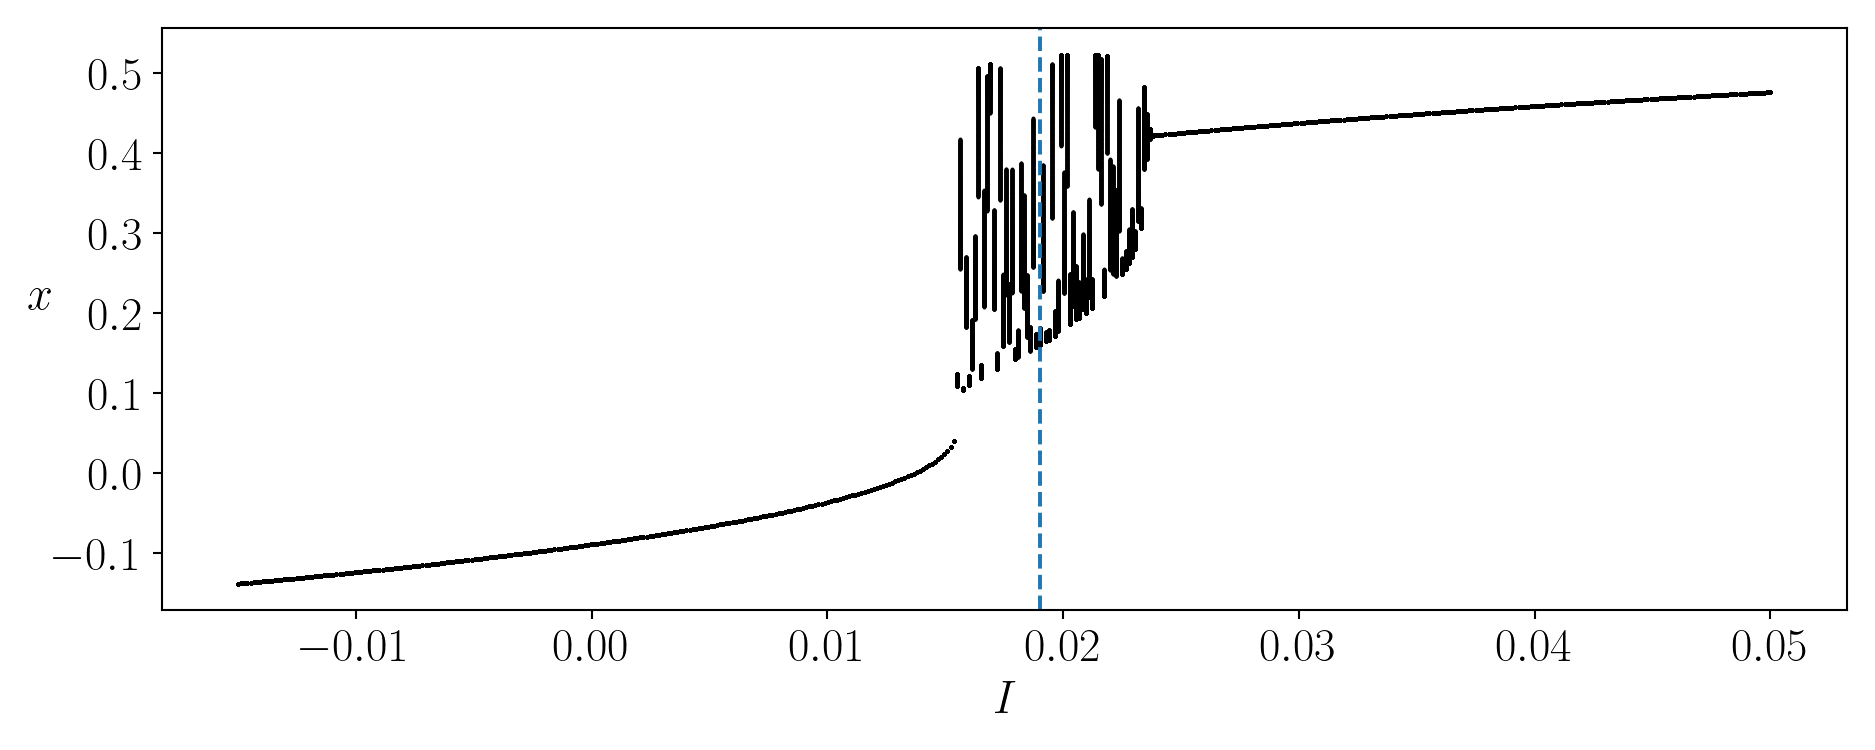

In [51]:
%matplotlib notebook

A = 0.0041 
alpha = 5.276
gamma = 0.3

betaStar = 0.9823286778291421 #collected from above


bd = pd.read_csv("bifurcation_data_beta_0.99.csv")
# bd = pd.read_csv("bifurcation_data_beta_betaStar.csv")
# bd = pd.read_csv("bifurcation_data_beta_0.97.csv")

bb = bd["I"]
ff = bd["F1"]

plt.figure(figsize=(10, 4))

plt.plot(bb, ff, 'ko', ms=0.5, rasterized=True)
plt.xlabel('$I$', size=sz)
plt.ylabel('$x$', rotation=False, size=sz)
plt.xticks(size=sz)
plt.yticks(size=sz)

plt.axvline(x = 0.019, ls='--')
# plt.axvline(x=0.022, ls = '--')


plt.tight_layout()

plt.savefig('C:/Users/ighosh/Desktop/frac_dML/BIF_beta_0.99.pdf')

## 4D model (linear flow coupling with $\theta$)

<IPython.core.display.Javascript object>


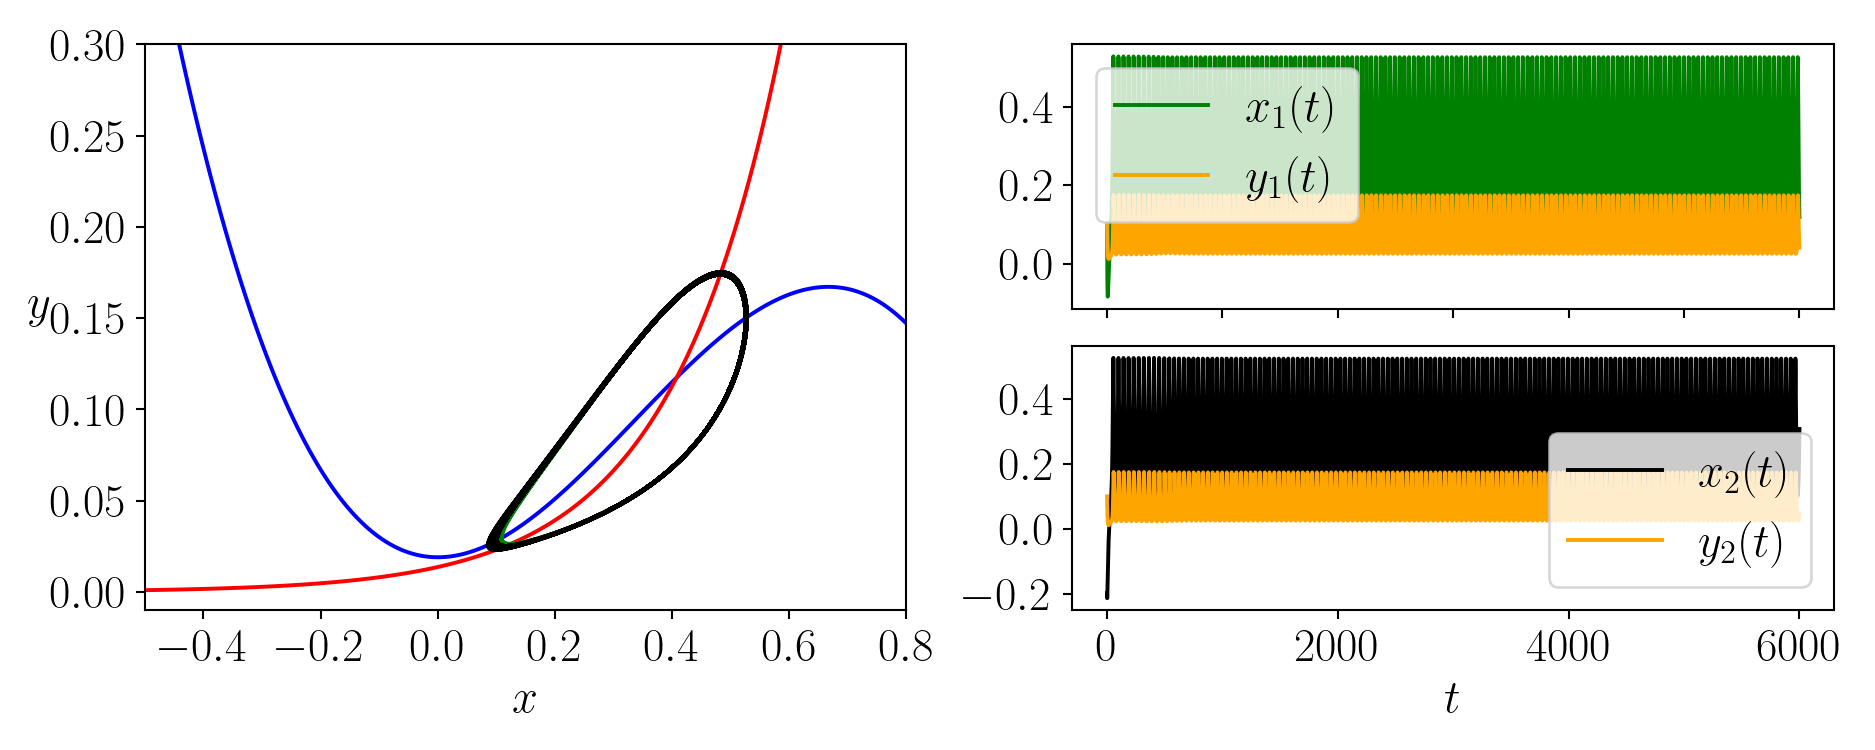

In [147]:

df = pd.read_csv("4D_beta_1B.csv")

%matplotlib notebook
A = 0.0041 
alpha = 5.276
gamma = 0.3
I=0.019

# theta = 0.008
theta = 0.001

sz=18

time, x1, y1, x2, y2 = df["T"], df["x1"], df["y1"], df["x2"], df["y2"]

gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(10, 4))

ax = plt.subplot(gs[:, 0])

x1_vals = np.linspace(-.5, .8, 200)
y1_vals = np.linspace(-0.01, 0.3, 200)

x2_vals = np.linspace(-.5, .8, 200)
y2_vals = np.linspace(-0.01, 0.3, 200)

X1, Y1 = np.meshgrid(x1_vals, y1_vals)
X2, Y2 = np.meshgrid(x2_vals, y2_vals)

nullcline_x1 = X1**2*(1-X1) - Y1 + I +theta*(X2-X1)
nullcline_y1 = A*np.exp(alpha*X1) - gamma*Y1
nullcline_x2 = X2**2*(1-X2) - Y2 + I +theta*(X1-X2)
nullcline_y2 = A*np.exp(alpha*X2) - gamma*Y2 

plt.contour(X1, Y1, nullcline_x1, levels=[0], colors='b')
plt.contour(X1, Y1, nullcline_y1, levels=[0], colors='r')

plt.plot(x1[10001:], y1[10001:], 'g-', rasterized=True, label = '$x_1(t)$ vs. $y_1(t)$')
plt.plot(x2[10001:], y2[10001:], 'k-', rasterized=True, label = '$x_2(t)$ vs. $y_2(t)$')
plt.xlabel("$x$", size=sz)
plt.ylabel("$y$", rotation=False,size=sz)
plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)


ax = plt.subplot(gs[0, 1]) 
plt.plot(time, x1, 'g-', label = '$x_1(t)$')
plt.plot(time, y1, '-', color="orange", label = '$y_1(t)$')
plt.xticks(visible=False)
plt.yticks(size=sz)
plt.legend(fontsize=sz)

ax = plt.subplot(gs[1, 1])
plt.plot(time, x2, 'k-', label = '$x_2(t)$')
plt.plot(time, y2, '-', color="orange", label = '$y_2(t)$')
plt.xlabel('$t$', size=sz)
plt.yticks(size=sz)
plt.xticks([0, 2000, 4000, 6000], size=sz)
plt.legend(fontsize=sz)

plt.tight_layout()

plt.savefig('C:/Users/ighosh/Desktop/frac_dML/pp_4D_beta_1.pdf')


# Compute $\tau^\pm(x^*), \delta^\pm(x^*), \beta^*$ for the coupled system

In [52]:

A = 0.0041
alpha = 5.276
gamma = 0.3
I=0.019

# theta = 0.008 #main
theta = 0.001

def func(x):
    return [x[0]**2*(1-x[0]) - A*np.exp(alpha*x[0])/gamma + I + theta*(x[1]-x[0]),
            x[1]**2*(1-x[1]) - A*np.exp(alpha*x[1])/gamma + I + theta*(x[0]-x[1])]

root = fsolve(func, [.5, .5])
root

xstar = root[0]
delta_plus = -gamma*xstar*(2-3*xstar) + alpha*A*np.exp(alpha*xstar)
tau_plus = xstar*(2-3*xstar) - gamma
delta_minus = -gamma*(xstar*(2-3*xstar) - 2*theta) + alpha*A*np.exp(alpha*xstar)
tau_minus = xstar*(2-3*xstar) - gamma - 2*theta

betaStar4D = min(2*np.arccos(min(1, tau_plus/(2*np.sqrt(delta_plus))))/np.pi, 2*np.arccos(min(1, tau_minus/(2*np.sqrt(delta_minus))))/np.pi)
xstar, delta_plus, tau_plus, delta_minus, tau_minus, betaStar4D


(0.40771631582656337,
 0.09089025270669754,
 0.016734849079568848,
 0.09149025270669753,
 0.014734849079568848,
 0.9823286778291465)

## plot the bifurcation diagram with varying $\beta$

<IPython.core.display.Javascript object>


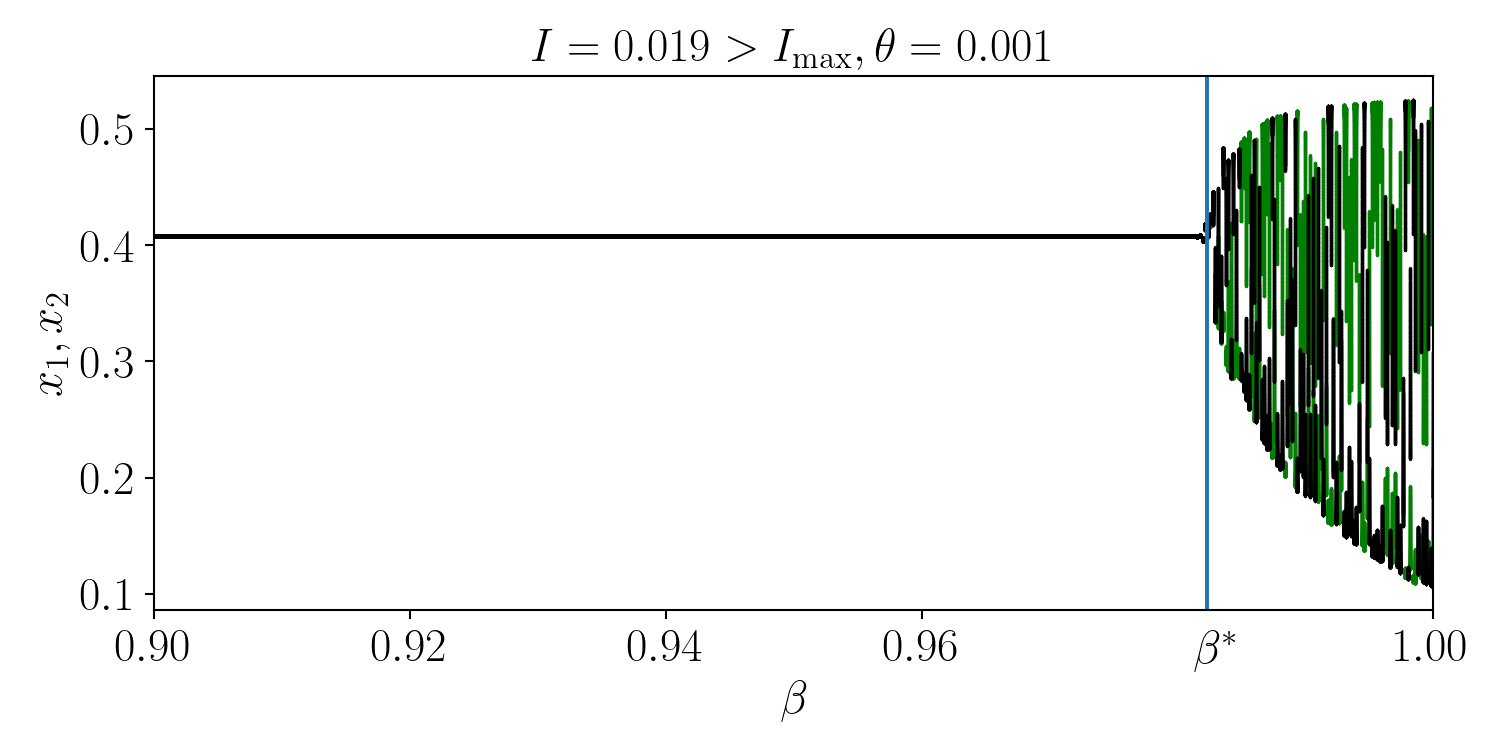

In [165]:

%matplotlib notebook

A = 0.0041 
alpha = 5.276
gamma = 0.3


# bd = pd.read_csv("bifurcation_data_4D_I_0.019.csv")
bd = pd.read_csv("bifurcation_data_4D_I_0.019B.csv")

bb = bd["β"]
ff1 = bd["x1"]
ff2 = bd["x2"]

plt.figure(figsize=(8, 4))
plt.plot(bb, ff1, 'go', ms=0.3, rasterized=True)
plt.plot(bb, ff2, 'ko', ms=0.3, rasterized=True)
plt.xlabel('$\\beta$', size=sz)
plt.ylabel('$x_1, x_2$', size=sz)
plt.xticks(size=sz)
plt.yticks(size=sz)


plt.xlim(0.9, 1)
plt.axvline(x = betaStar4D)

# plt.text(betaStar4D-0.001, 0.13, "$\\beta^*$", size= sz)
plt.text(betaStar4D-0.001, 0.04, "$\\beta^*$", size= sz)

plt.xticks([1, 0.96,0.94, 0.92, 0.9], fontsize=sz)
plt.title("$I = 0.019 > I_{\\rm max}, \\theta = 0.001$", size=sz)

plt.tight_layout()

# plt.savefig('C:/Users/ighosh/Desktop/frac_dML/BIF_4D_I_0.19.pdf')
plt.savefig('C:/Users/ighosh/Desktop/frac_dML/BIF_4D_I_0.19B.pdf')

## 4D model (sigmoidal flow coupling with $\sigma$)

<IPython.core.display.Javascript object>


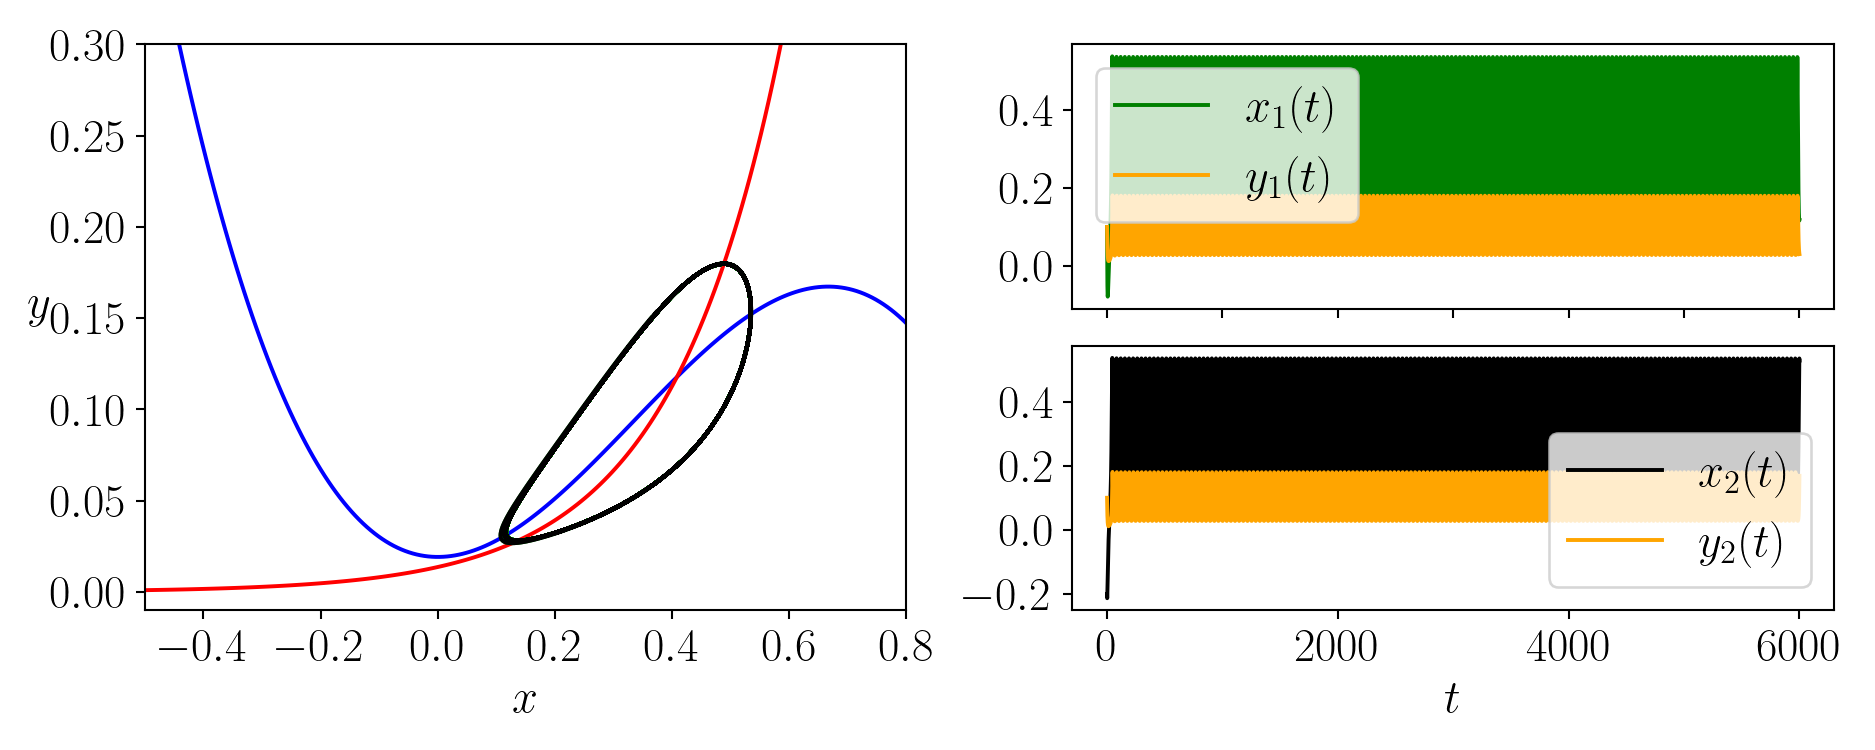

C:\Users\ighosh\AppData\Local\Temp\ipykernel_1552\4066739647.py:64: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ighosh\AppData\Local\Temp\ipykernel_1552\4066739647.py:66: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('C:/Users/ighosh/Desktop/frac_dML/pp_4D_Chem_beta_1.pdf')


In [53]:

df = pd.read_csv("4D_Chem_beta_1.csv")

%matplotlib notebook
A = 0.0041
alpha = 5.276
gamma = 0.3
I=0.019

# sigma = 0.001
sigma = 0.0001

vs = 2
lamb= 10
q = -0.25

sz=18

time, x1, y1, x2, y2 = df["T"], df["x1"], df["y1"], df["x2"], df["y2"]

gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(10, 4))

ax = plt.subplot(gs[:, 0])

x1_vals = np.linspace(-.5, .8, 200)
y1_vals = np.linspace(-0.01, 0.3, 200)

x2_vals = np.linspace(-.5, .8, 200)
y2_vals = np.linspace(-0.01, 0.3, 200)

X1, Y1 = np.meshgrid(x1_vals, y1_vals)
X2, Y2 = np.meshgrid(x2_vals, y2_vals)

nullcline_x1 = X1**2*(1-X1) - Y1 + I +sigma*(vs-X1)/(1+np.exp(-lamb*(X2-q)))
nullcline_y1 = A*np.exp(alpha*X1) - gamma*Y1
nullcline_x2 = X2**2*(1-X2) - Y2 + I +sigma*(vs-X2)/(1+np.exp(-lamb*(X1-q)))
nullcline_y2 = A*np.exp(alpha*X2) - gamma*Y2 

plt.contour(X1, Y1, nullcline_x1, levels=[0], colors='b')
plt.contour(X1, Y1, nullcline_y1, levels=[0], colors='r')

plt.plot(x1[5001:], y1[5001:], 'g-', rasterized=True, label = '$x_1(t)$ vs. $y_1(t)$')
plt.plot(x2[5001:], y2[5001:], 'k-', rasterized=True, label = '$x_2(t)$ vs. $y_2(t)$')
plt.xlabel("$x$", size=sz)
plt.ylabel("$y$", rotation=False,size=sz)
plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)

ax = plt.subplot(gs[0, 1])
plt.plot(time, x1, 'g-', label = '$x_1(t)$')
plt.plot(time, y1, '-', color="orange", label = '$y_1(t)$')
plt.xticks(visible=False)
plt.yticks(size=sz)
plt.legend(fontsize=sz)

ax = plt.subplot(gs[1, 1])
plt.plot(time, x2, 'k-', label = '$x_2(t)$')
plt.plot(time, y2, '-', color="orange", label = '$y_2(t)$')
plt.xlabel('$t$', size=sz)
plt.yticks(size=sz)
plt.xticks([0, 2000, 4000, 6000], size=sz)
plt.legend(fontsize=sz)

plt.tight_layout()

plt.savefig('C:/Users/ighosh/Desktop/frac_dML/pp_4D_Chem_beta_1.pdf')


# Compute $\tau^\pm(x^*), \delta^\pm(x^*), \beta^*$ for the coupled system

In [56]:
A = 0.0041
alpha = 5.276
gamma = 0.3
I=0.019

sigma = 0.001
# sigma = 0.0001

vs = 2
lamb= 10
q = -0.25

def func(x):
    return [x[0]**2*(1-x[0]) - A*np.exp(alpha*x[0])/gamma + I + sigma*(vs-x[0])/(1+np.exp(-lamb*(x[1]-q))),
            x[1]**2*(1-x[1]) - A*np.exp(alpha*x[1])/gamma + I + sigma*(vs-x[1])/(1+np.exp(-lamb*(x[0]-q)))]

root = fsolve(func, [.5, .5])
root

xstar = root[0]
xstar

def R(pp): return lamb*np.exp(-lamb*(pp-q))/(1+np.exp(-lamb*(pp-q)))**2



delta_plus = -gamma*(xstar*(2-3*xstar)-sigma/(1+np.exp(-lamb*(xstar-q))) + sigma*(vs-xstar)*R(xstar)) + alpha*A*np.exp(alpha*xstar)
tau_plus = xstar*(2-3*xstar)-sigma/(1+np.exp(-lamb*(xstar-q))) + sigma*(vs-xstar)*R(xstar) - gamma
delta_minus = -gamma*(xstar*(2-3*xstar)-sigma/(1+np.exp(-lamb*(xstar-q))) - sigma*(vs-xstar)*R(xstar)) + alpha*A*np.exp(alpha*xstar)
tau_minus = xstar*(2-3*xstar)-sigma/(1+np.exp(-lamb*(xstar-q))) - sigma*(vs-xstar)*R(xstar) - gamma


betaStar4DChem = min(2*np.arccos(min(1, tau_plus/(2*np.sqrt(delta_plus))))/np.pi, 2*np.arccos(min(1, tau_minus/(2*np.sqrt(delta_minus))))/np.pi)
xstar, delta_plus, tau_plus, delta_minus, tau_minus, betaStar4DChem

(0.41278881064966494,
 0.09692849133642745,
 0.01341607853902027,
 0.09694105691215005,
 0.013374193286611602,
 0.9862822273431693)

## plot the bifurcation diagram with varying $\beta$


<IPython.core.display.Javascript object>


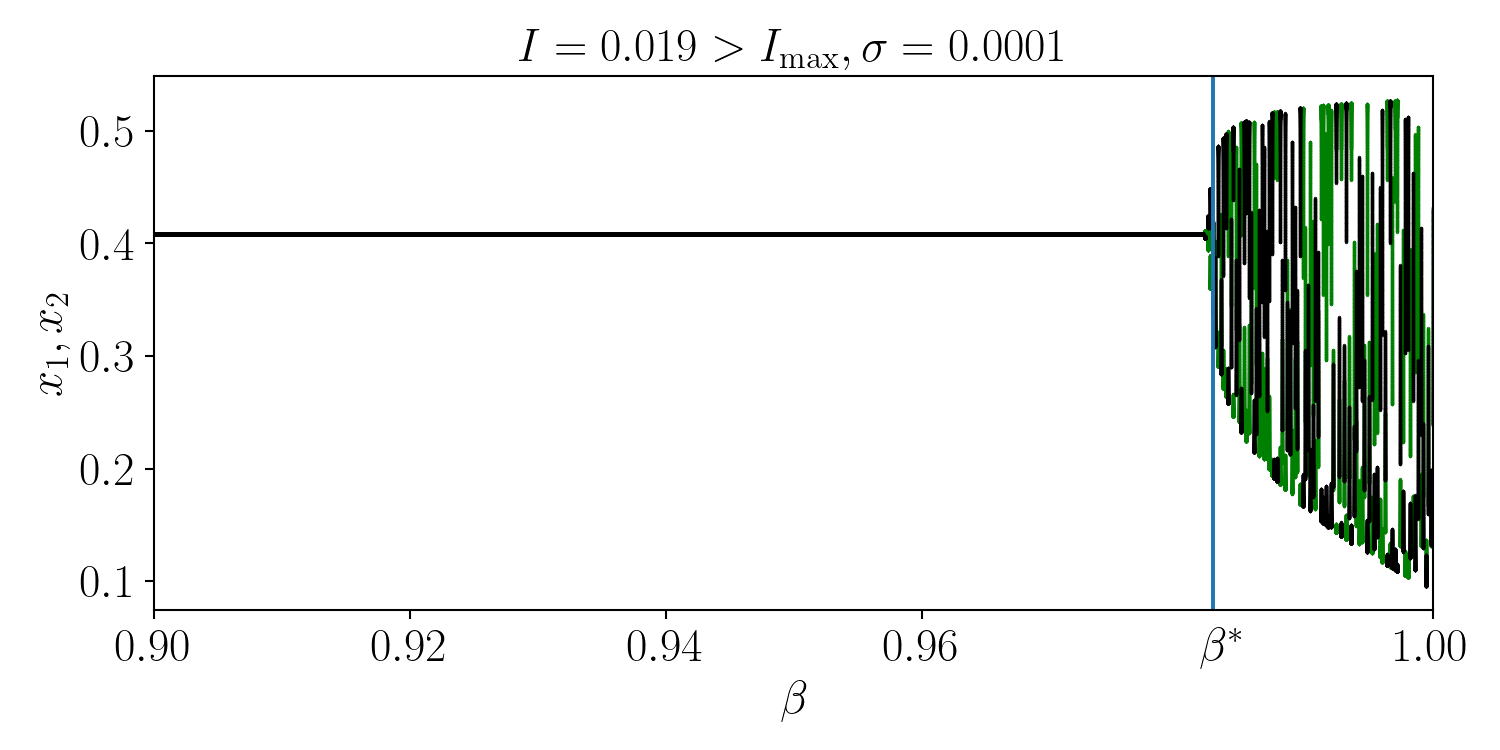

In [57]:
#collected from above cell
betaStar4DChem = 0.9862822273431693
betaStar4DChemB = 0.9827373824143903

%matplotlib notebook

A = 0.0041 
alpha = 5.276
gamma = 0.3


bd = pd.read_csv("bifurcation_data_4D_I_chem_0.019B.csv")

bb = bd["β"]
ff1 = bd["x1"]
ff2 = bd["x2"]

plt.figure(figsize=(8, 4))

plt.plot(bb, ff1, 'go', ms=0.3, rasterized=True)
plt.plot(bb, ff2, 'ko', ms=0.3, rasterized=True)
plt.xlabel('$\\beta$', size=sz)
plt.ylabel('$x_1, x_2$', size=sz)
plt.xticks(size=sz)
plt.yticks(size=sz)


plt.xlim(0.9, 1)
plt.axvline(x = betaStar4DChemB)

# plt.text(betaStar4DChem-0.001, 0.05, "$\\beta^*$", size= sz)
# plt.xticks([1, 0.98, 0.96,0.94, 0.92, 0.9], fontsize=sz)

plt.text(betaStar4DChemB-0.001, 0.03, "$\\beta^*$", size= sz)
plt.xticks([1, 0.96,0.94, 0.92, 0.9], fontsize=sz)

# plt.title("$I = 0.019 > I_{\\rm max}, \\sigma = 0.001$", size=sz)
plt.title("$I = 0.019 > I_{\\rm max}, \\sigma = 0.0001$", size=sz)

plt.tight_layout()

plt.savefig('C:/Users/ighosh/Desktop/frac_dML/BIF_4D_Chem_I_0.19B.pdf')

# Hopf curves $\beta^*$ on a $(I, \beta)$-plane

<IPython.core.display.Javascript object>


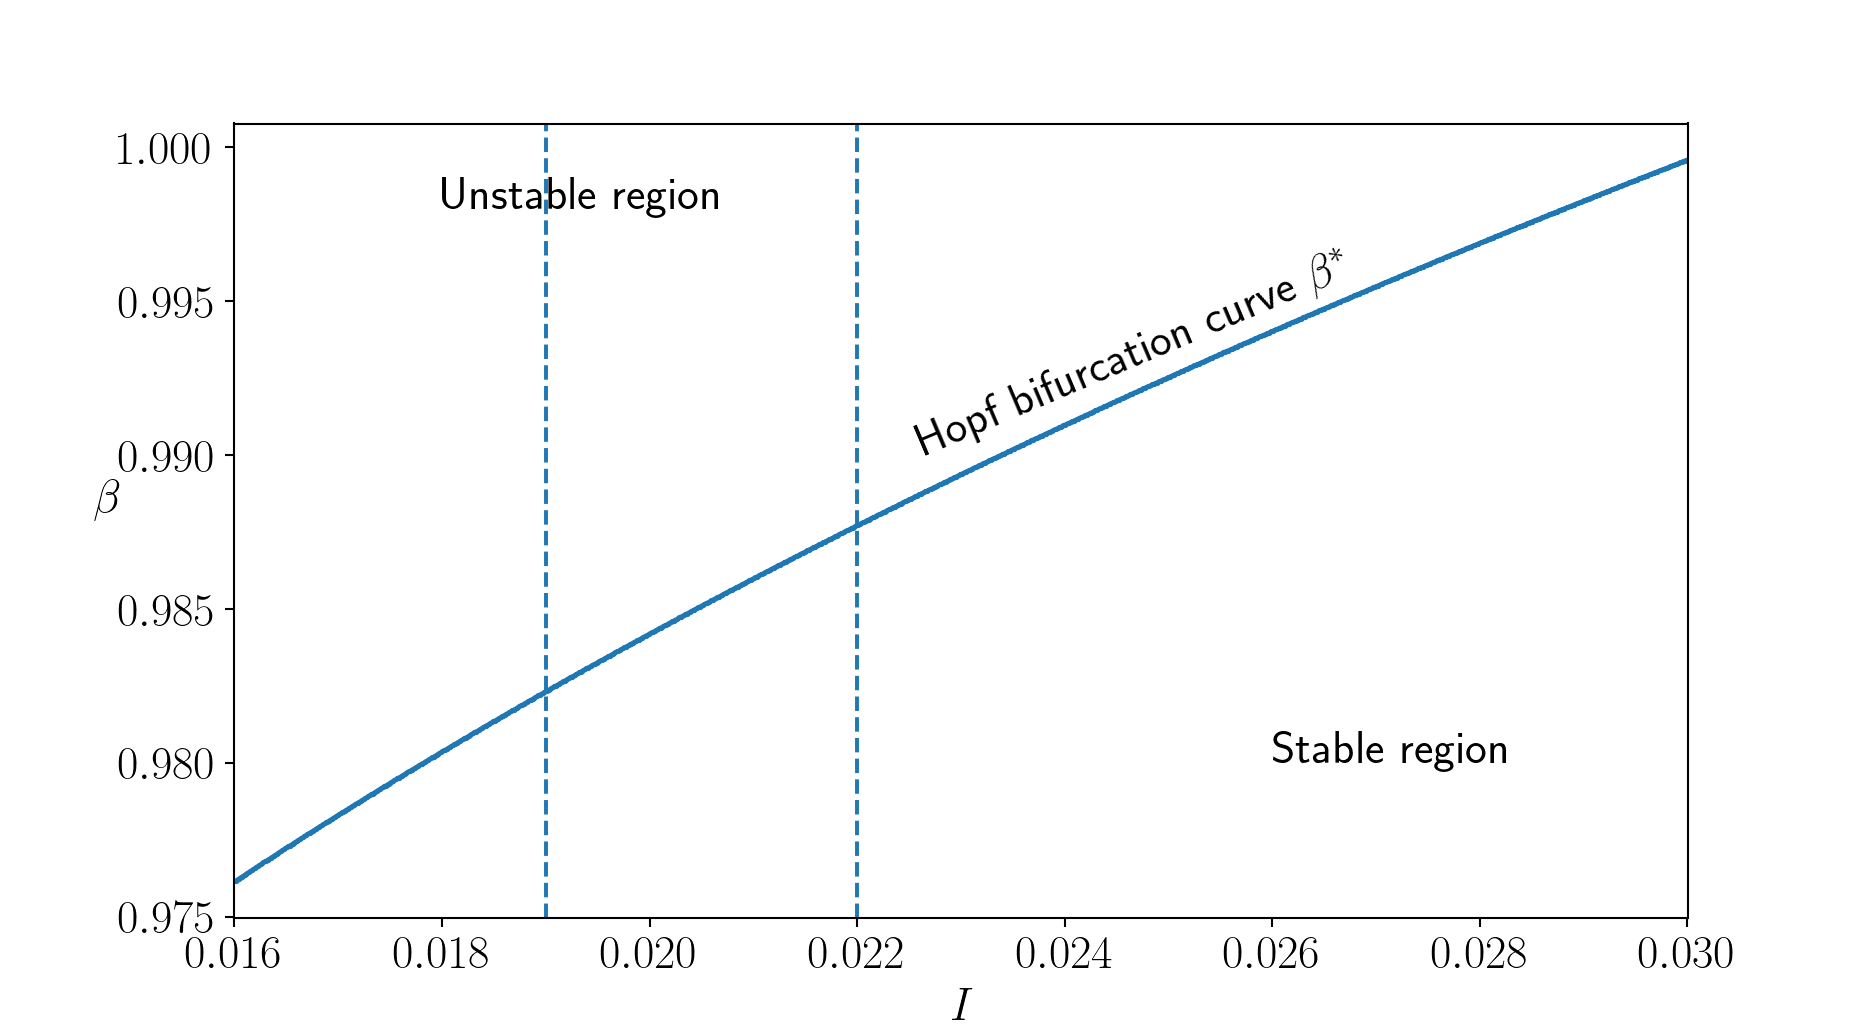

In [60]:
II = np.linspace(0.016, 0.03, 1000)
BB = []
for I in II:
    A = 0.0041
    alpha = 5.276
    gamma = 0.3

    def eq(x):
        return x**2*(1-x)-A*np.exp(alpha*x)/gamma +I

    guess=0.5
    root = fsolve(eq, guess)

    r= root[0]

    tau = r*(2-3*r) - gamma
    delta = -gamma*r*(2-3*r) + alpha*A*np.exp(alpha*r)
    betaStar = 2*np.arccos(min(1, tau/(2*np.sqrt(delta))))/np.pi
   
    BB+=[betaStar, ]

%matplotlib notebook
plt.figure(figsize=(10, 5.5))
plt.plot(II, BB, 'o-', ms=1)
plt.xlabel("$I$", size=sz)
plt.ylabel("$\\beta$", size=sz, rotation = False)
plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)

plt.axvline(x=0.019, ls='--')
plt.axvline(x=0.022, ls = '--')

plt.xlim(0.016, 0.03)
plt.text(0.026, 0.98, "Stable region", size=sz)
plt.text(0.018, 0.998, "Unstable region", size=sz)
plt.text(0.02254, 0.99, "Hopf bifurcation curve $\\beta^*$", size = sz, rotation = 23)
plt.savefig('C:/Users/ighosh/Desktop/frac_dML/HopfCurve2D.pdf')

<IPython.core.display.Javascript object>


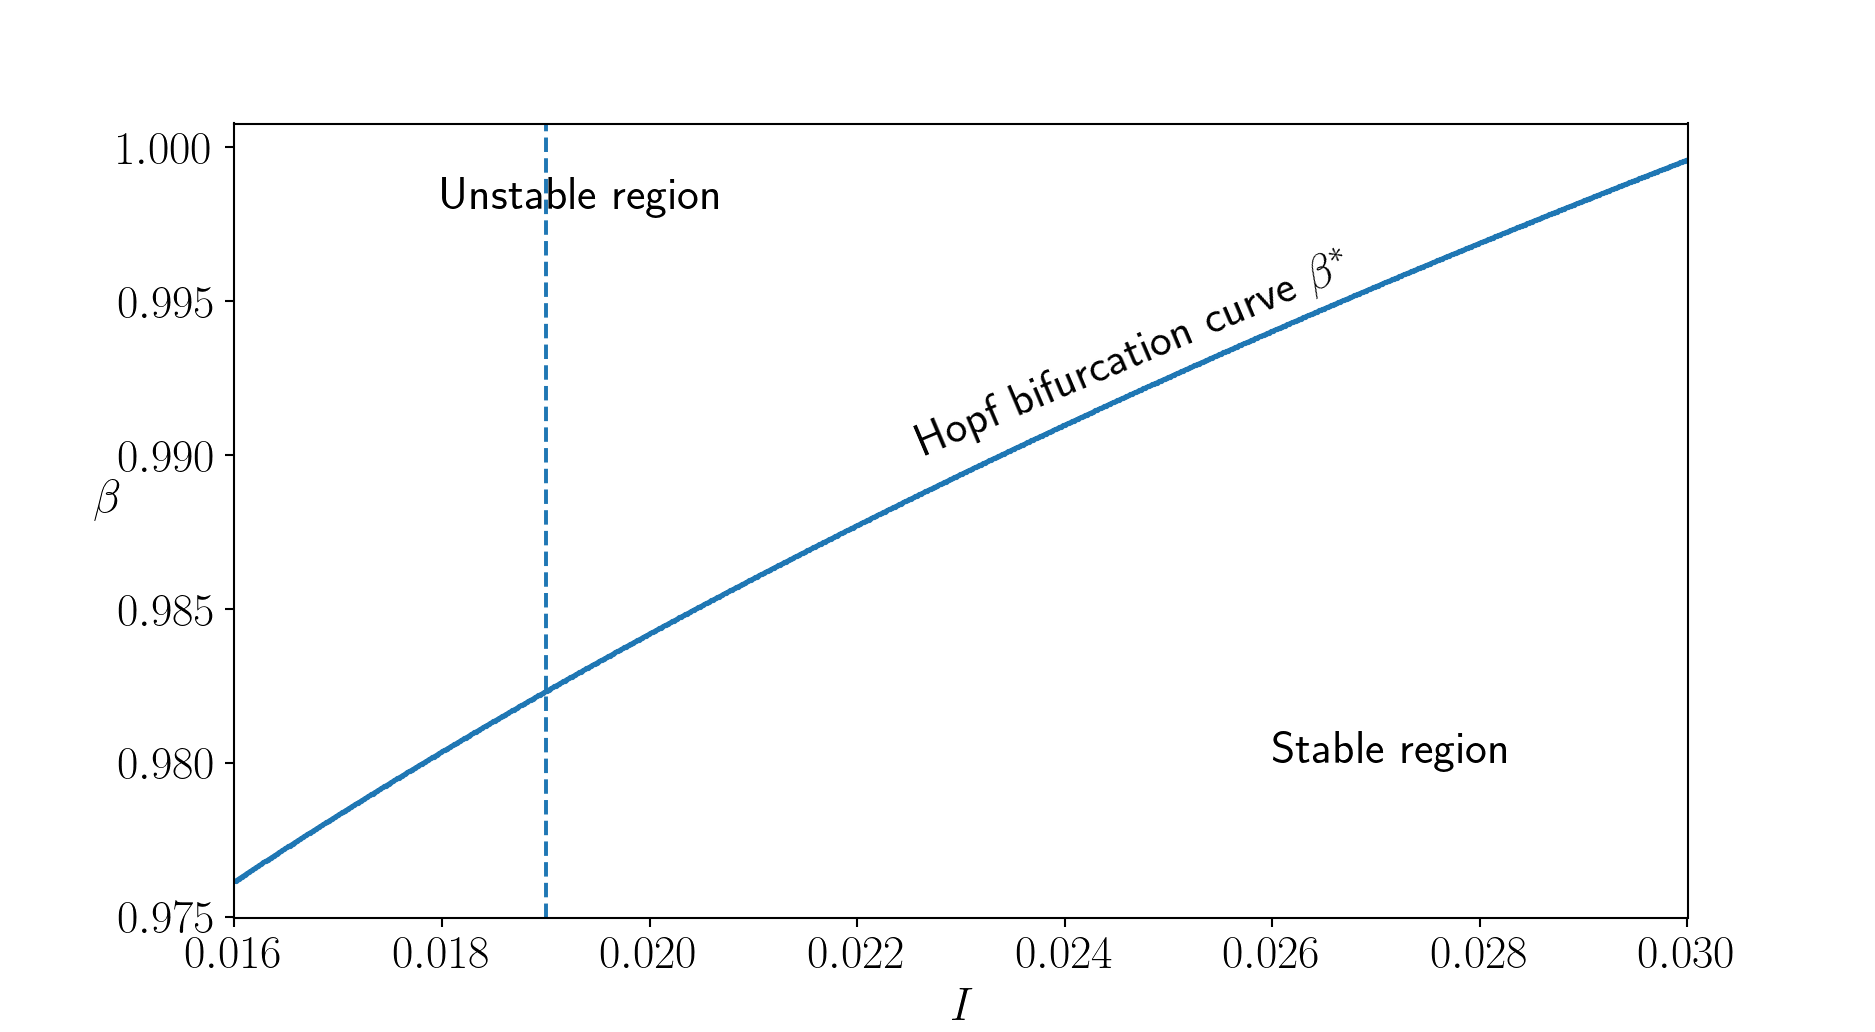

In [61]:
II = np.linspace(0.016, 0.03, 1000)
BB = []
for I in II:
    A = 0.0041
    alpha = 5.276
    gamma = 0.3
    theta = 0.008

    def func(x):
        return [x[0]**2*(1-x[0]) - A*np.exp(alpha*x[0])/gamma + I + theta*(x[1]-x[0]),
                x[1]**2*(1-x[1]) - A*np.exp(alpha*x[1])/gamma + I + theta*(x[0]-x[1])]

    root = fsolve(func, [.5, .5])
    root

    xstar = root[0]
    delta_plus = -gamma*xstar*(2-3*xstar) + alpha*A*np.exp(alpha*xstar)
    tau_plus = xstar*(2-3*xstar) - gamma
    delta_minus = -gamma*(xstar*(2-3*xstar) - 2*theta) + alpha*A*np.exp(alpha*xstar)
    tau_minus = xstar*(2-3*xstar) - gamma - 2*theta

    betaStar4D = min(2*np.arccos(min(1, tau_plus/(2*np.sqrt(delta_plus))))/np.pi, 2*np.arccos(min(1, tau_minus/(2*np.sqrt(delta_minus))))/np.pi)
   
    BB+=[betaStar4D, ]

%matplotlib notebook
plt.figure(figsize=(10, 5.5))
plt.plot(II, BB, 'o-', ms=1)
plt.xlabel("$I$", size=sz)
plt.ylabel("$\\beta$", size=sz, rotation = False)
plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)
plt.axvline(x=0.019, ls='--')

plt.xlim(0.016, 0.03)
plt.text(0.026, 0.98, "Stable region", size=sz)
plt.text(0.018, 0.998, "Unstable region", size=sz)
plt.text(0.02254, 0.99, "Hopf bifurcation curve $\\beta^*$", size = sz, rotation = 23)
plt.savefig('C:/Users/ighosh/Desktop/frac_dML/HopfCurve4D.pdf')

<IPython.core.display.Javascript object>


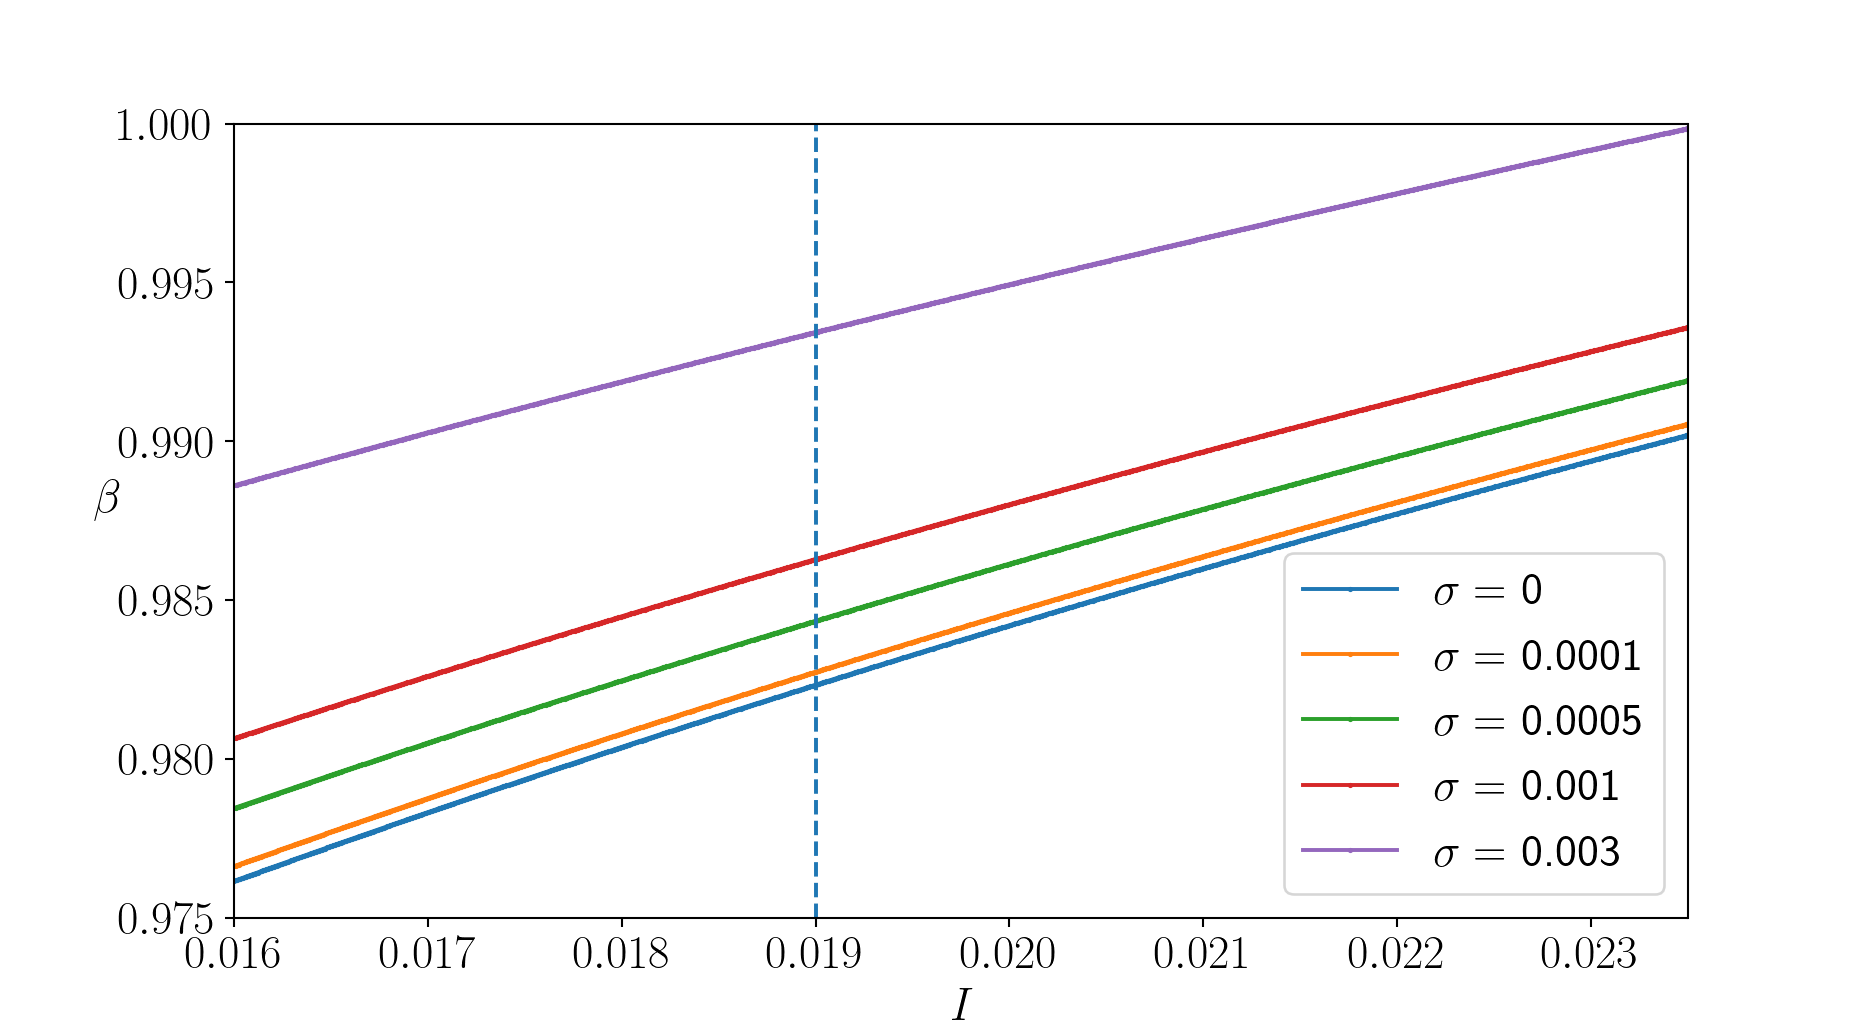

In [63]:
%matplotlib notebook
plt.figure(figsize=(10, 5.5))


SS = [0, 0.0001, 0.0005, 0.001, 0.003]

for sigma in SS:
    II = np.linspace(0.016, 0.0235, 1000)
    BB = []
    for I in II:
        A = 0.0041
        alpha = 5.276
        gamma = 0.3
    #     sigma = 0.001

        vs = 2
        lamb= 10
        q = -0.25

        def func(x):
            return [x[0]**2*(1-x[0]) - A*np.exp(alpha*x[0])/gamma + I + sigma*(vs-x[0])/(1+np.exp(-lamb*(x[1]-q))),
                    x[1]**2*(1-x[1]) - A*np.exp(alpha*x[1])/gamma + I + sigma*(vs-x[1])/(1+np.exp(-lamb*(x[0]-q)))]

        root = fsolve(func, [.5, .5])
        root

        xstar = root[0]
        xstar

        def R(pp): return lamb*np.exp(-lamb*(pp-q))/(1+np.exp(-lamb*(pp-q)))**2



        delta_plus = -gamma*(xstar*(2-3*xstar)-sigma/(1+np.exp(-lamb*(xstar-q))) + sigma*(vs-xstar)*R(xstar)) + alpha*A*np.exp(alpha*xstar)
        tau_plus = xstar*(2-3*xstar)-sigma/(1+np.exp(-lamb*(xstar-q))) + sigma*(vs-xstar)*R(xstar) - gamma
        delta_minus = -gamma*(xstar*(2-3*xstar)-sigma/(1+np.exp(-lamb*(xstar-q))) - sigma*(vs-xstar)*R(xstar)) + alpha*A*np.exp(alpha*xstar)
        tau_minus = xstar*(2-3*xstar)-sigma/(1+np.exp(-lamb*(xstar-q))) - sigma*(vs-xstar)*R(xstar) - gamma

        # delta_plus = -gamma*xstar*(2-3*xstar) + alpha*A*np.exp(alpha*xstar)
        # tau_plus = xstar*(2-3*xstar) - gamma
        # delta_minus = -gamma*(xstar*(2-3*xstar) - 2*theta) + alpha*A*np.exp(alpha*xstar)
        # tau_minus = xstar*(2-3*xstar) - gamma - 2*theta

        betaStar4DChem = min(2*np.arccos(min(1, tau_plus/(2*np.sqrt(delta_plus))))/np.pi, 2*np.arccos(min(1, tau_minus/(2*np.sqrt(delta_minus))))/np.pi)

        BB+=[betaStar4DChem, ]


    plt.plot(II, BB, 'o-', ms=1, label ="$\\sigma =$ "+str(sigma))

plt.xlabel("$I$", size=sz)
plt.ylabel("$\\beta$", size=sz, rotation = False)
plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)
plt.axvline(x=0.019, ls='--')
plt.xlim(0.016, 0.0235)
plt.ylim(0.975, 1)

plt.legend(fontsize=sz)
plt.savefig('C:/Users/ighosh/Desktop/frac_dML/HopfCurve4DChem.pdf')